In [2]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [6]:
 from sklearn.cluster import \
(KMeans,AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram,cut_tree)


In [12]:
wine_df = pd.read_csv(r'C:\Users\Anukul\Downloads\wine.csv')

In [13]:
wine_df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [42]:
selected_columns = wine_df.iloc[:, 0:11]

In [43]:
selected_columns.mean()

fixed.acidity             7.215307
volatile.acidity          0.339666
citric.acid               0.318633
residual.sugar            5.443235
chlorides                 0.056034
free.sulfur.dioxide      30.525319
total.sulfur.dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
dtype: float64

In [19]:
selected_columns.var()

fixed.acidity              1.680740
volatile.acidity           0.027105
citric.acid                0.021117
residual.sugar            22.636696
chlorides                  0.001227
free.sulfur.dioxide      315.041192
total.sulfur.dioxide    3194.720039
density                    0.000009
pH                         0.025853
sulphates                  0.022143
alcohol                    1.422561
dtype: float64

In [34]:
init = range(10, 40,5)
inertia = []
for i in init:
    kmeans = KMeans(n_clusters = 2, random_state = 1, n_init = i)
    kmeans.fit(wine_scaled)
    inertia.append(kmeans.inertia_)
inertia_df = pd.DataFrame({"n_init" : init, "Inertia" : inertia})
inertia_df
  

n_init       Inertia
0      10  56143.929379
1      15  56143.929379
2      20  56143.929379
3      25  56143.929379
4      30  56143.929379
5      35  56143.929379

Since the value of inertia does not depend on initialisations, we randomly select 25

In [35]:
    kmeans = KMeans(n_clusters = 2, random_state = 1, n_init = 25)
    kmeans.fit(wine_scaled)

KMeans(n_clusters=2, n_init=25, random_state=1)

In [39]:
wine_df["cluster"]=kmeans.labels_

In [57]:
wine_df.groupby('color').agg({
    'fixed.acidity':'mean',
    'volatile.acidity':'mean',
    'citric.acid':'mean',
    'residual.sugar':'mean',
    'chlorides':'mean',
    'free.sulfur.dioxide':'mean',
    'total.sulfur.dioxide':'mean',
    'density':'mean',
    'pH':'mean',
    'sulphates':'mean',
    'alcohol':'mean'})

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
color                                                                 
red         8.319637          0.527821     0.270976        2.538806   
white       6.854788          0.278241     0.334192        6.391415   

       chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density  \
color                                                                   
red     0.087467            15.874922             46.467792  0.996747   
white   0.045772            35.308085            138.360657  0.994027   

             pH  sulphates    alcohol  
color                                  
red    3.311113   0.658149  10.422983  
white  3.188267   0.489847  10.514267

In [58]:
wine_df.groupby('Cluster').agg({
    'fixed.acidity':'mean',
    'volatile.acidity':'mean',
    'citric.acid':'mean',
    'residual.sugar':'mean',
    'chlorides':'mean',
    'free.sulfur.dioxide':'mean',
    'total.sulfur.dioxide':'mean',
    'density':'mean',
    'pH':'mean',
    'sulphates':'mean',
    'alcohol':'mean'})

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
Cluster                                                                 
0             8.290798          0.532212     0.269439        2.631079   
1             6.851864          0.274598     0.335257        6.393554   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density  \
Cluster                                                                   
0         0.088288            15.755941             48.544790  0.996742   
1         0.045134            35.516371            138.453563  0.994006   

               pH  sulphates    alcohol  
Cluster                                  
0        3.309872   0.656740  10.402559  
1        3.187624   0.488867  10.521958

Clusters made out of K means are comparable to the characteristics in the Column 'Color' in our dataset. Hence K Means created distinction similar to our dataset.

PCA

Since, variables have vastly different means and variances, we transform the data using StandardScaler

In [61]:
scaler = StandardScaler(with_std=True,with_mean=True)
wine_scaled = scaler.fit_transform(selected_columns)

In [62]:
PCAwine = PCA()

In [63]:
PCAwine.fit(wine_scaled)

PCA()

In [65]:
 PCAwine.components_

array([[-2.38798897e-01, -3.80757499e-01,  1.52388438e-01,
         3.45919930e-01, -2.90112586e-01,  4.30914008e-01,
         4.87418060e-01, -4.49366366e-02, -2.18686443e-01,
        -2.94135169e-01, -1.06437120e-01],
       [ 3.36354536e-01,  1.17549716e-01,  1.83299403e-01,
         3.29914181e-01,  3.15257992e-01,  7.19325988e-02,
         8.72662782e-02,  5.84037336e-01, -1.55869002e-01,
         1.91715769e-01, -4.65057692e-01],
       [ 4.34301304e-01, -3.07259420e-01,  5.90569674e-01,
        -1.64688429e-01, -1.66791047e-02, -1.34223949e-01,
        -1.07462297e-01, -1.75605553e-01, -4.55324122e-01,
         7.00424827e-02,  2.61100527e-01],
       [-1.64346214e-01, -2.12784888e-01,  2.64300312e-01,
        -1.67443015e-01,  2.44743855e-01,  3.57278939e-01,
         2.08420143e-01, -7.27249582e-02,  4.14551098e-01,
         6.40535710e-01,  1.06802696e-01],
       [ 1.47480376e-01, -1.51455988e-01,  1.55348697e-01,
         3.53361853e-01, -6.14391068e-01, -2.23532291e-01,
  

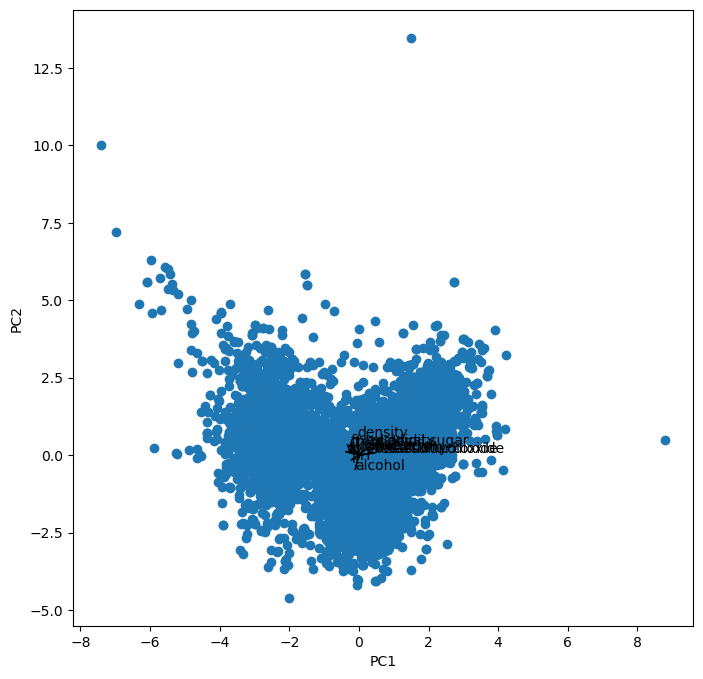

In [68]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range( PCAwine.components_.shape[1]):
    ax.arrow(0, 0,  PCAwine.components_[i,k], PCAwine.components_[j,k])
    ax.text( PCAwine.components_[i,k],
    PCAwine.components_[j,k],
    wine_df.columns[k])

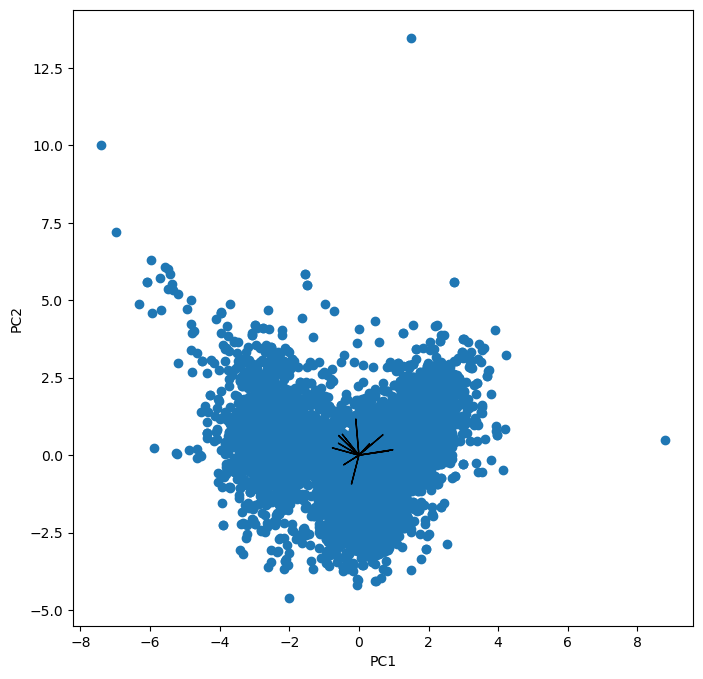

In [73]:
scale_arrow = s_ = 2
scores[:,1] *= -1
PCAwine.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(PCAwine.components_.shape[1]):
    ax.arrow(0, 0, s_*PCAwine.components_[i,k], s_*PCAwine.components_[j,k])


In [75]:
PCAwine.explained_variance_

array([3.03033507, 2.49420993, 1.55658654, 0.97070149, 0.71998573,
       0.6074052 , 0.5232393 , 0.50158749, 0.33707593, 0.22773082,
       0.03283586])

In [77]:
PCAwine.explained_variance_ratio_

array([0.2754426 , 0.22671146, 0.14148609, 0.08823201, 0.06544317,
       0.05521016, 0.04755989, 0.04559184, 0.03063855, 0.02069961,
       0.00298462])

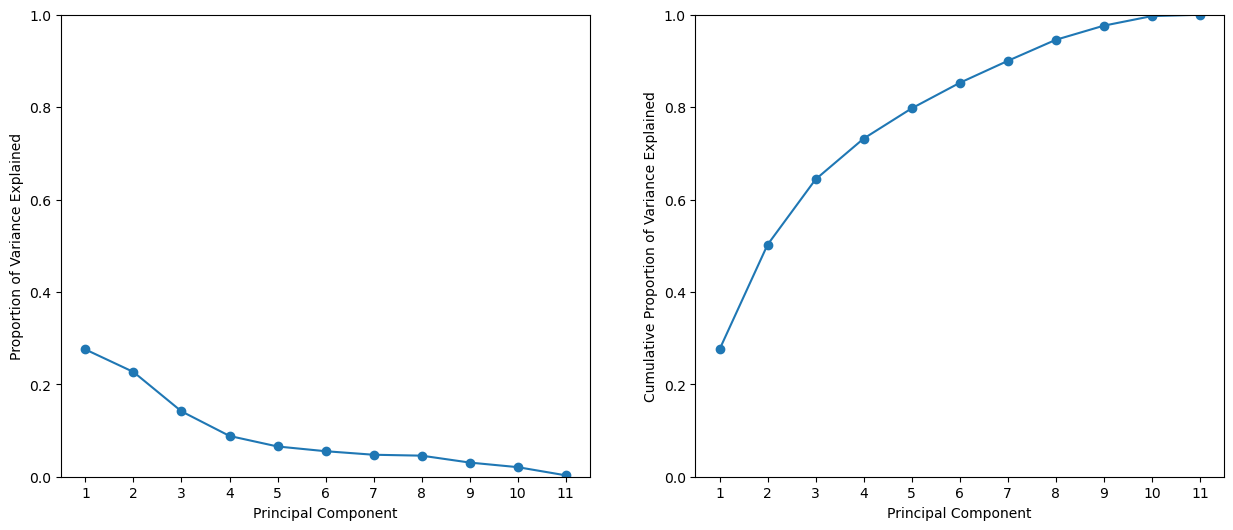

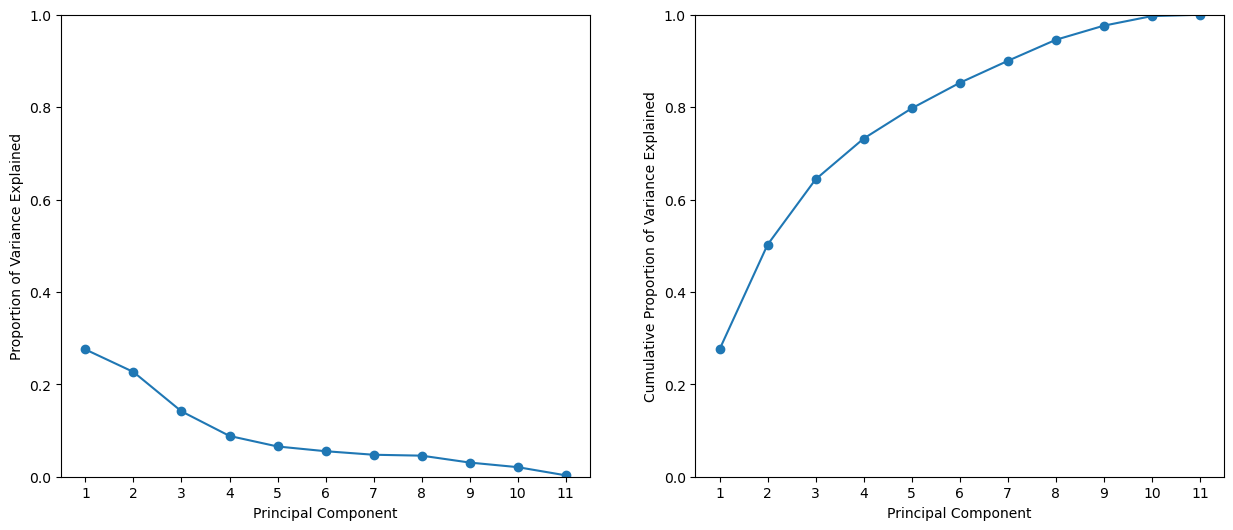

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(PCAwine.n_components_)+1
ax = axes[0]
ax.plot(ticks,PCAwine.explained_variance_ratio_,marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks,PCAwine.explained_variance_ratio_.cumsum(),marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

The first four components amount for 73% of the data so, we selected the first 4 components

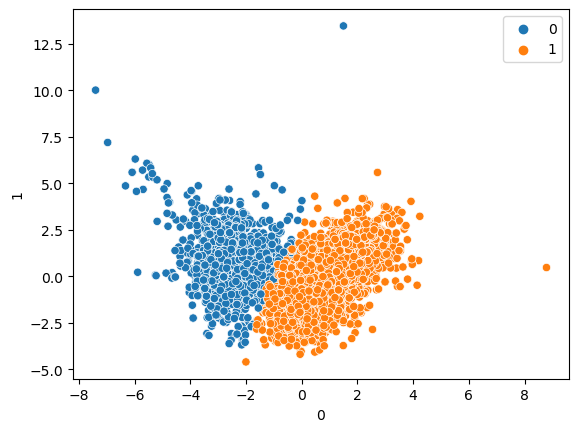

In [99]:
df_pca = pd.DataFrame(PCA(4).fit_transform(wine_scaled))
kmeans = KMeans(n_clusters = 2, random_state = 1, n_init = 25)
kmeans.fit(df_pca)
pca_labels = kmeans.labels_
sns.scatterplot(data = df_pca, x = df_pca.iloc[:, 0],y = df_pca.iloc[:, 1], hue = pca_labels)
plt.show()

In [120]:
wine_df['pca_Cluster']=pca_labels

In [121]:
wine_df['pca_Cluster'] = wine_df['pca_Cluster'].replace(0, 'red')
wine_df['pca_Cluster'] = wine_df['pca_Cluster'].replace(1, 'white')

In [122]:
wine_df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  Cluster  cluster pca_Cluster  
0      9.4        5   red        0        0         red  
1      9.8        5   red        0        0         red  
2      9.8        5   red        0        0         red  
3      9.8        6   red        0        0         red  
4      9.4        5   red        0        0         red

In [123]:
equal_count = (wine_df['color'] == wine_df['pca_Cluster']).sum()

In [125]:
equal_count/wine_df['color'].count()

0.9839926119747576

K Means Clustering after PCA gave an accuracy of 98.4%.

t-SNE

In [126]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)


tsne_results = tsne.fit_transform(wine_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.035s...
[t-SNE] Computed neighbors for 6497 samples in 1.858s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.146950
[t-SNE] KL divergence after 1000 iterations: 1.409052


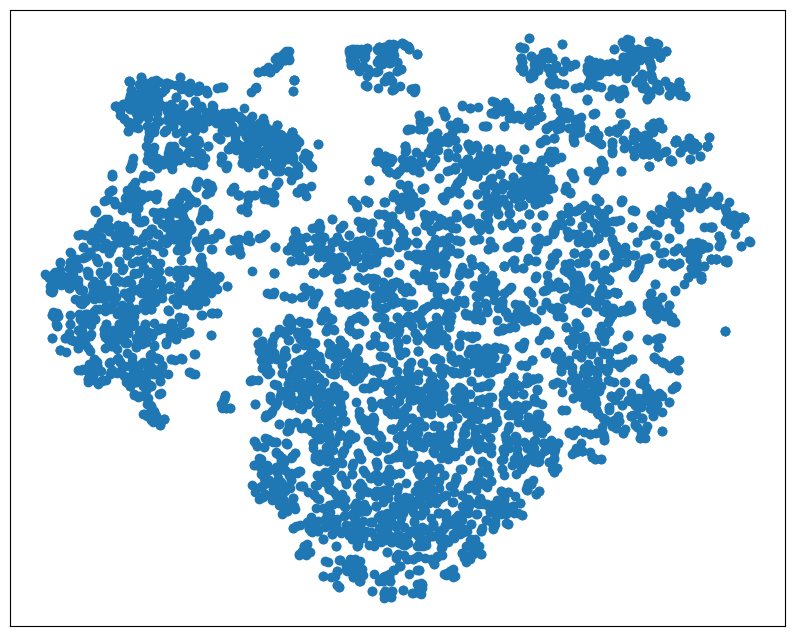

In [127]:
plt.figure(figsize=(10,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.show()

In [129]:
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

tsne_df['color'] = wine_df['color'].values

fig = px.scatter(tsne_df, x='Dim1', y='Dim2', hover_data=['color'])
fig.show()

In [133]:
tsne_df['quality'] = wine_df['quality'].values

fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='quality', hover_data=['color'])
fig.show()

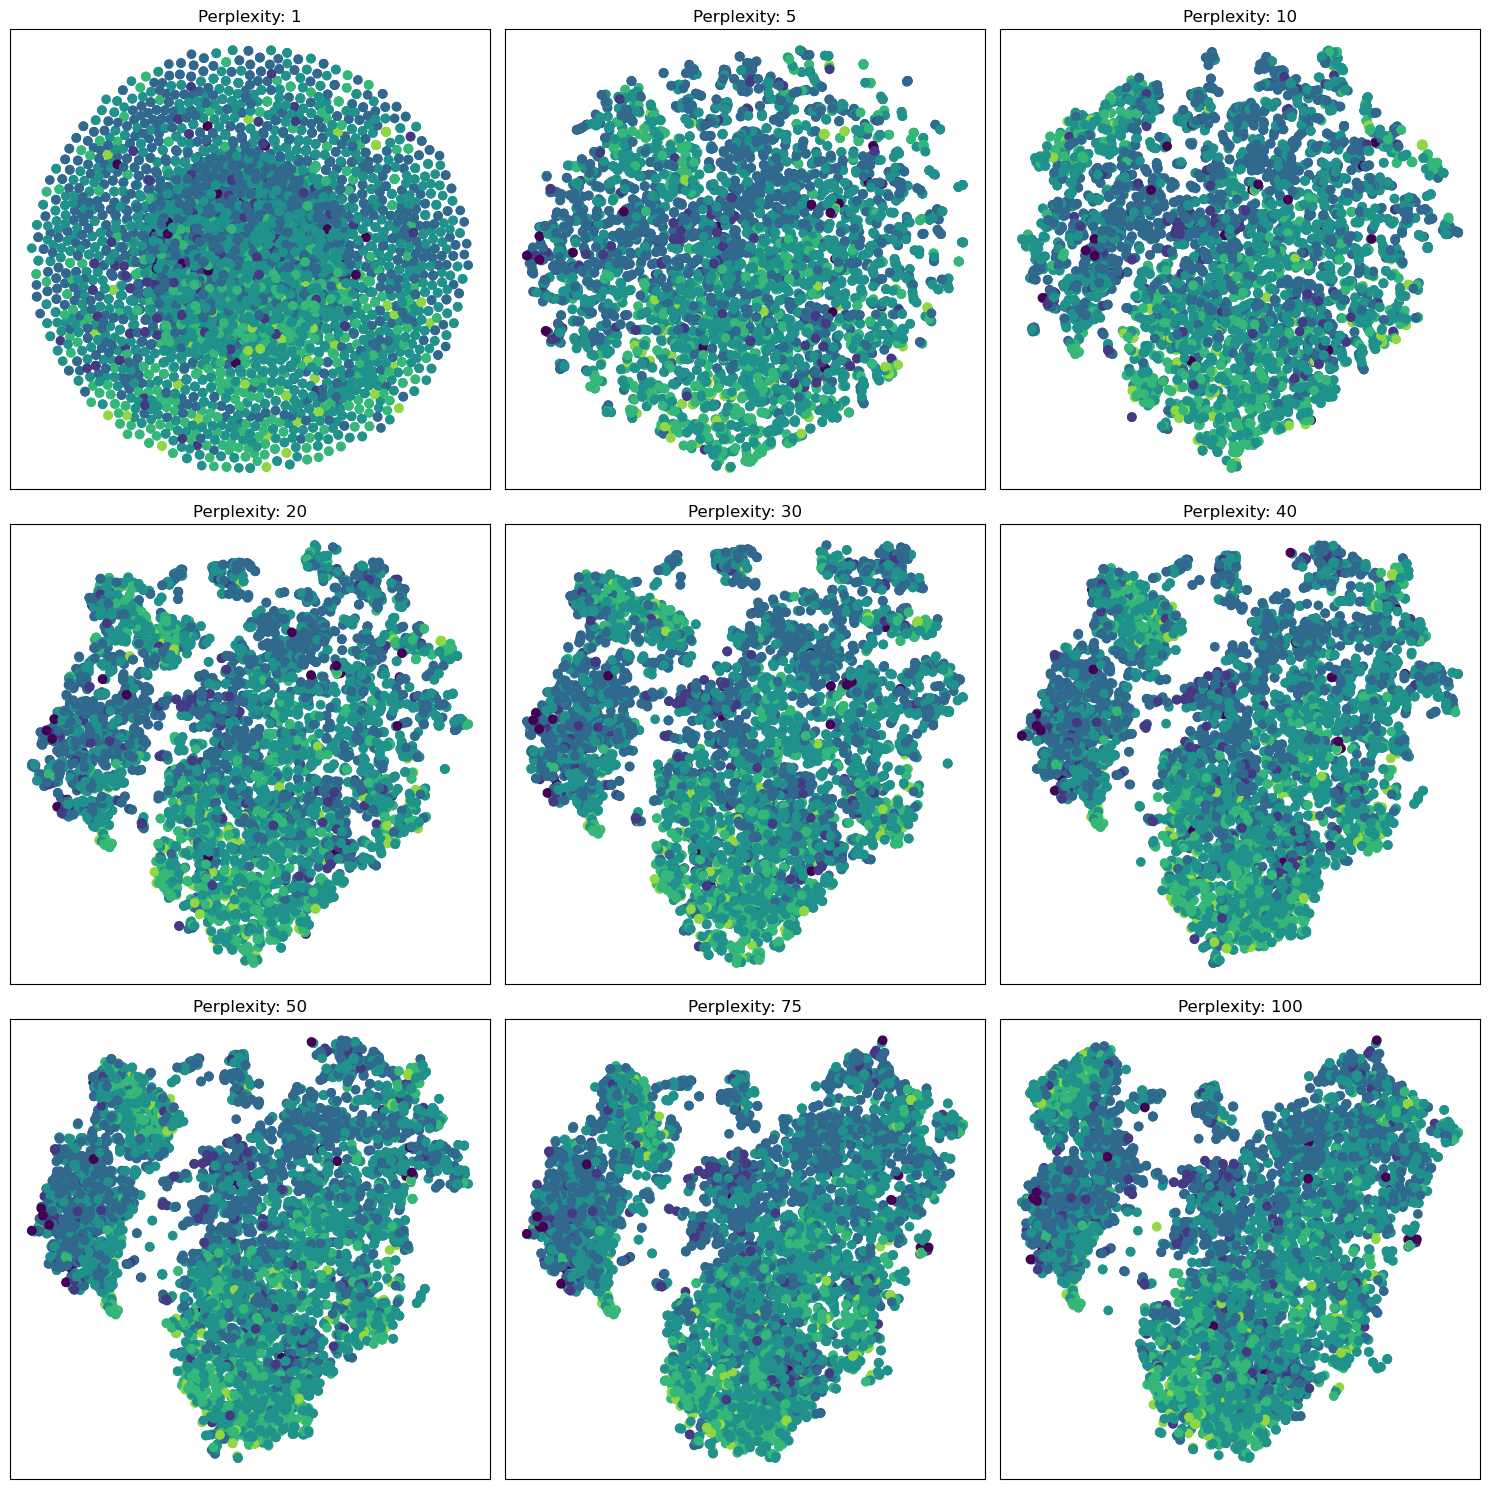

In [134]:
# define perplexity values to use
perplexities = [1, 5, 10, 20, 30, 40, 50, 75, 100]

# create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15,15))

# reshape axs to 1D array
axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
    # run t-SNE with the specified perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(wine_scaled)
    
    # convert the t-SNE results to a pandas DataFrame
    tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

    # add the categories to this DataFrame
    tsne_df['quality'] = wine_df['quality'].values

    # create a scatter plot in the corresponding subplot
    scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['quality'])
    axs[i].set_title(f'Perplexity: {perplexity}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

# show the plot
plt.tight_layout()
plt.show()

Based on the plots, t-SNE appears to have created distinct clusters. Thus, it looks like a better way to segregate data into Red and White Wine.

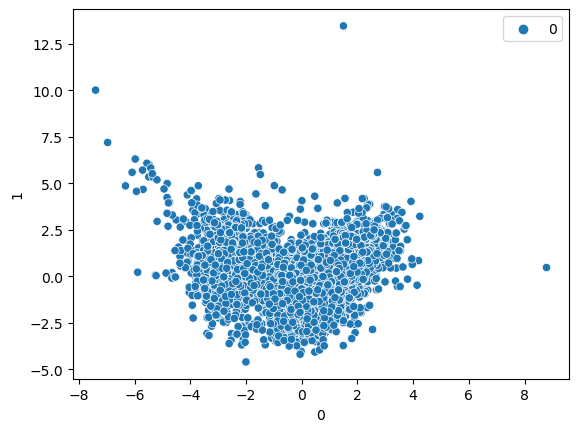

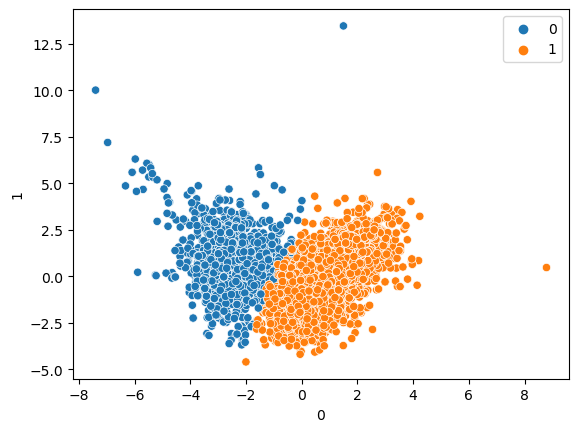

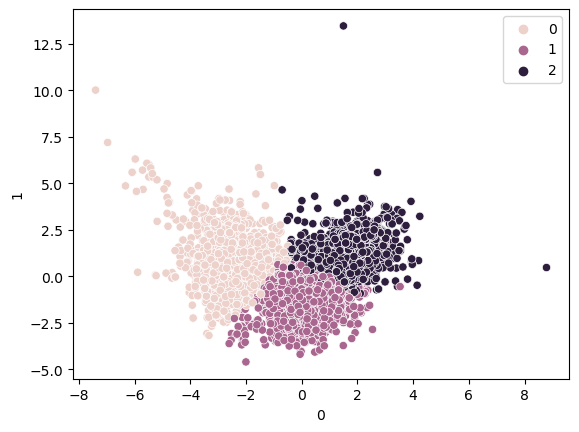

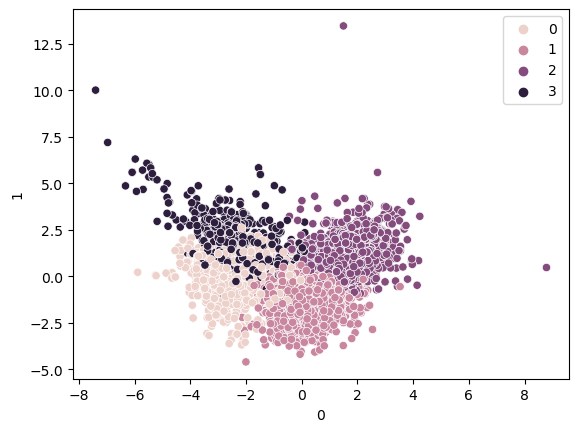

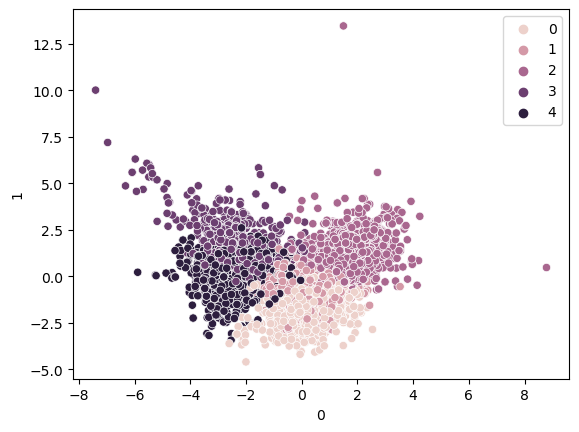

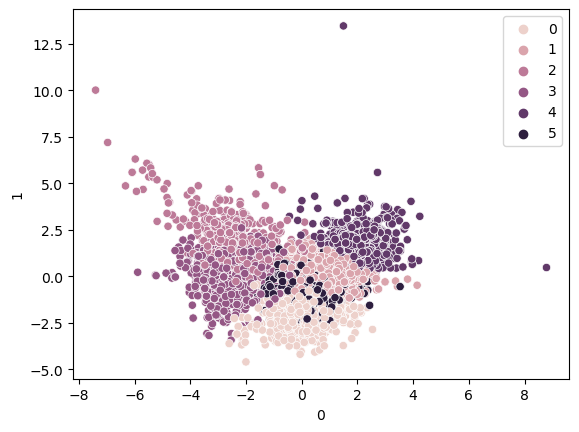

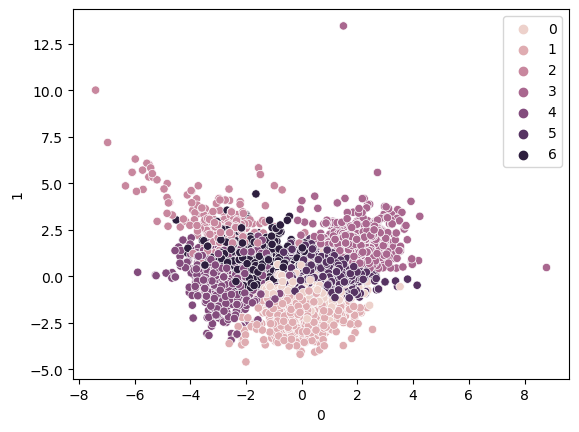

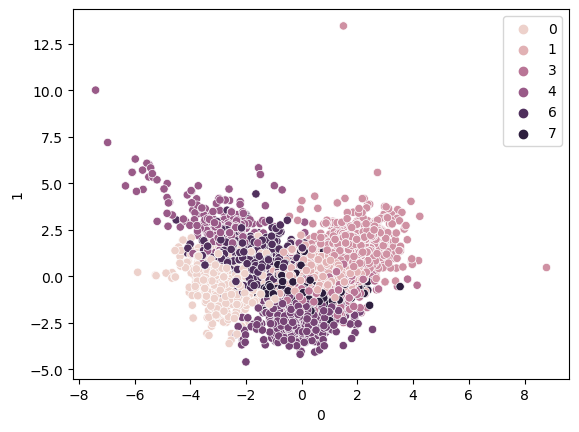

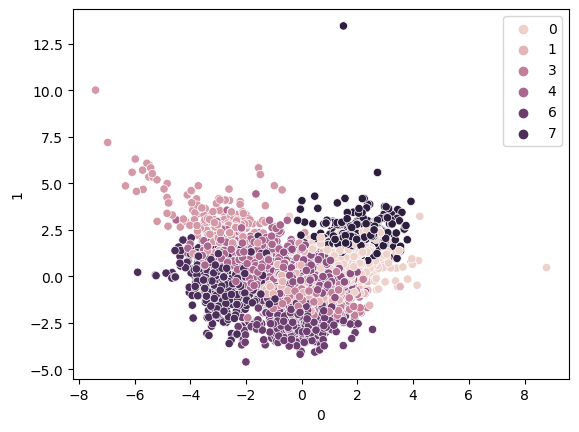

In [139]:
df_pca2 = pd.DataFrame(PCA(4).fit_transform(wine_scaled))

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 1, n_init = 25)
    kmeans.fit(df_pca)
    pca2_labels = kmeans.labels_
    sns.scatterplot(data = df_pca2, x = df_pca2.iloc[:, 0],y = df_pca2.iloc[:, 1], hue = pca2_labels)
    plt.show()

For quality, the clusters saturated at 7 clusters. This is because quality only has 7 values.

*Market Segmentation

In [3]:
ms_df = pd.read_csv(r'C:\Users\Anukul\Downloads\social_marketing.csv')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
ms_df.iloc[:,1:].describe()

chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000   
mean      1.070287       1.594012     1.788632     1.397488     0.863867   
std       1.658783       2.160917     3.031113     1.775557     1.132562   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%       1.000000       1.000000     1.000000     1.000000     1.000000   
75%       1.000000       2.000000     2.000000     2.000000     1.000000   
max      17.000000      20.000000    37.000000    16.000000    10.000000   

       home_and_garden        music         news  online_gaming     shopping  \
count      7882.000000  7882.000000  7882.000000    7882.000000  7882.000000   
mean          0.520680     0.679269     1.205532       1.208830     1.389368   
std           0.736691     1.030015     2.100780       2.687465     1.808846   
min           0.000000     0.000000     0.000000       0.000000     0.000000   
25%           0.000000     0.000000     0.000000       0.000000     0.000000   
50%           0.000000     0.000000     0.000000       0.000000     1.000000   
75%           1.000000     1.000000     1.000000       1.000000     2.000000   
max           5.000000    13.000000    20.000000      27.000000    12.000000   

       health_nutrition  college_uni  sports_playing      cooking  \
count       7882.000000  7882.000000     7882.000000  7882.000000   
mean           2.567242     1.549480        0.639178     1.998224   
std            4.496144     2.897154        0.975517     3.429941   
min            0.000000     0.000000        0.000000     0.000000   
25%            0.000000     0.000000        0.000000     0.000000   
50%            1.000000     1.000000        0.000000     1.000000   
75%            3.000000     2.000000        1.000000     2.000000   
max           41.000000    30.000000        8.000000    33.000000   

               eco    computers     business     outdoors       crafts  \
count  7882.000000  7882.000000  7882.000000  7882.000000  7882.000000   
mean      0.512307     0.649074     0.423243     0.782669     0.515859   
std       0.769725     1.179453     0.692379     1.209483     0.816848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       6.000000    16.000000     6.000000    12.000000     7.000000   

        automotive          art     religion       beauty    parenting  \
count  7882.000000  7882.000000  7882.000000  7882.000000  7882.000000   
mean      0.829866     0.724816     1.095407     0.705151     0.921340   
std       1.366151     1.629576     1.914829     1.327903     1.515359   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.0000